Partie 2 Classification
Ch10, 50 Introduction

La régression linéaire permet d'estimer une valeur en fonction d'une ou plusieurs caractéristiques lorsque cette valeur est continue.

La classification elle permet de résoudre des problèmes discrets, par exemple
déterminer si:
    .Un email devrait classifié comme spam ou non
    .Un acheteur va acheter ou non
    .Iris setosa|versicolor|virginica 
    .Reconnaissance de caractères
    .Déterminer la survit ou non d'un passager du titanic

le programme des cours à suivre dans cette branche sont:
    .La régression logistique (modèle simple permettant d'étendre la régression linéaire et de faire de la classification)
    .Les réseaux de neurones (permet de résoudre des problèmes poussés comme la recognition de pattern dans les images)
    .Leur évaluation

Objectif de la classification:
Déterminer l'appartenance à une catégorie en fonction des caractéristiques



Ch 11 Régression Logistique

51 Régression Linéaire vs Logistique


Linéaire:
Prédire valeurs continues
.Largeur de pétale d'iris
.Prix de vente d'une maison
.Valeur de stock

Logistique:
.Prédire des valeurs discrètes 
    .L'élève va réussir l'examen ou non
    .Il va pleuvoir ou non
    .Chien ou chat

Régression logstique est une extension de la régression linéaire.




52 Rappel sur les probabilités

En machine learning, les probabilités sont exprimées de 0 à 1


53 La fonction logistique 

La régression logistique doit son nom à la fonction qu'elle utilise; 
la fonction logistique encore appelée la Sigmoïde.

Elle est continu eet définie sur ]-inf, +inf[

Elle a une forme de S tend vers 1 en + l'infini et vers 0 en moins l'infini.
Sa valeur en 0 est de -0.5.

Son domain d'arrivée étant ]0, 1[, il est possible de l'employer pour exprimer des probabilités.


Son équation est:

sigma(x) = 1/(1+exp(-x))


54 Implémentation sigmoïde

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Définition de la fonction sigmoïde

In [7]:
def sigmoide(x):
    s =  1/(1 + np.exp(-x))
    return s

In [8]:
s = sigmoide(0)
print(s)

0.5


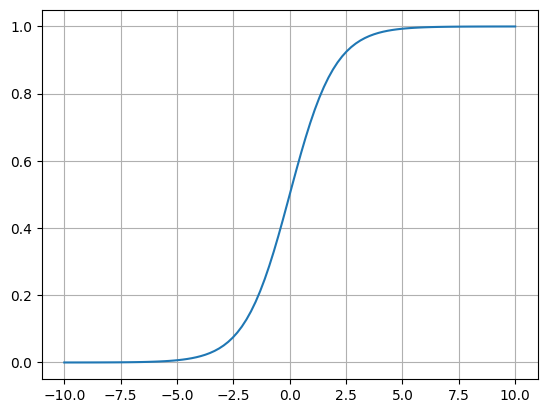

In [14]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoide(x))
plt.grid()
plt.show()

55: Le modèle de prédiction logistique

Pour notre modèle nous allons changer la convention pour décrire une fonction composée:

sigma(y) = 1/(1+exp(-y))

Avec y = b + S(wi*xi) 
(Régression linéaire en première output)

56: Implémentation: modèle prédictif

In [16]:
#Adaptée pour reg multiple

def reg_lin(b, w, x):
    y = 0
    for wi, xi in zip(w, x):
        y += wi * xi
    y += b 
    return y

In [22]:
def regression_log(b, w, x):
    y = reg_lin(b, w, x)
    s = sigmoide(y)
    return s


In [23]:
b = 1
w = [1]
x = [2]

print(regression_log(b, w, x))

0.9525741268224334


57 Présentation du dataset

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('/home/t0r3l/CodingTime/Certifications/Udemy/Machine Learning/classification.csv')

<Axes: xlabel='x1', ylabel='x2'>

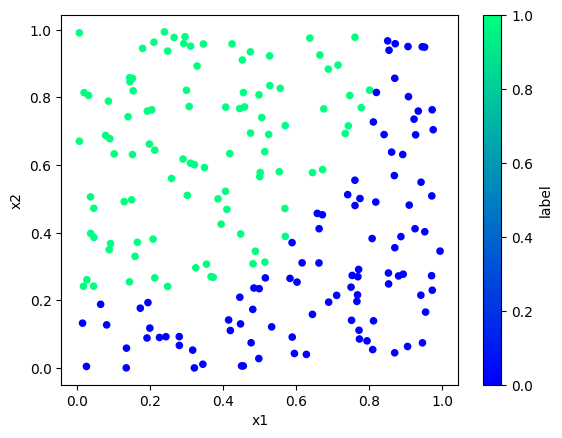

In [29]:
#Fonction pandas permettant de catégoriser les données avec le paramètre c
df.plot.scatter(x = 'x1', y = 'x2', c = 'label', colormap = 'winter')

Le but la régression logistique est de déterminer si une variable dépendente appartient à une catégorie ou une autre en fonction de ses variables indépendantes.

Afin de ce faire, une droite de décision doit être tracée pour séparer les données.
Ici ce serait entre nos point bleus et noirs. 



59: Implémentation avec sklearn

In [39]:
from sklearn.linear_model import LogisticRegression

#Lorsqu'on emploi LogistiqueRegression de sklearn, y doit être converti en liste

X = df[['x1', 'x2']].values
y = df[['label']].values

#Nous voyons ici que y est au format colonne(array?)
#Pour le convertir en liste(ligne?) employer la méthode .ravel()
print(y)

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [40]:
y = y.ravel()
print(y)

[0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0.]


In [41]:
log = LogisticRegression()
log.fit(X, y)

LogisticRegression()

Dans un cas réel il faudrait spliter notre jeu de données comme vu précédemment, 
mais fast life

In [43]:
y_pred = log.predict(X)

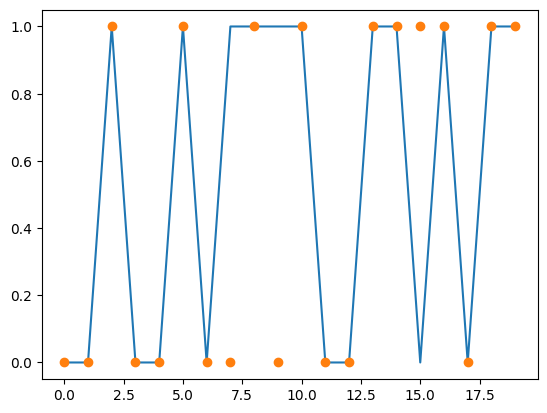

In [46]:
#Nous avons en bleu les prédictions et en rouge les valeurs réelles 
#Nous voyons en changeant n à 50 que notre modèle se trompe rarement
n = 20
plt.plot(y[:n])
plt.plot(y_pred[:n],  'o')
plt.show()

In [51]:
#Coef et biais du modèle de régression linéaire dont 
#l'output est en input de la régression logistique ci-dessus
print(log.coef_, log.intercept_)

[[-4.10750016  3.97790711]] [0.15824859]


In [54]:
#notre modèle est juste à 86%
s = log.score(X, y)
s

0.865

60: Limite de décision

Ici nous allons voir comment notre modèle peut déterminer la limite de décision pour déterminer si une donnée appartient à une catégorie ou une autre.


Ici la limite de décision serait la diagonale du plan
catégorie bleue = 0
catégorie noir = 0

<Axes: xlabel='x1', ylabel='x2'>

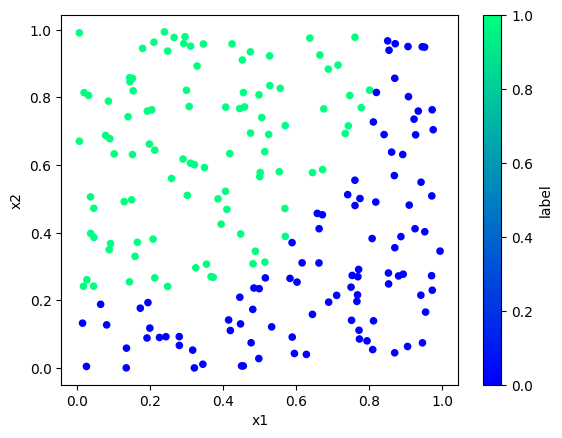

In [55]:
df.plot.scatter(x = 'x1', y = 'x2', c = 'label', colormap = 'winter')

la limite de décision pour la fonction  sigmoide, est la droite égale à 0
comme ci-dessous.

Ainsi, dans le cas de la régression logistique, La limite de décision est la droite 
y = b + S(wi*xi) = 0

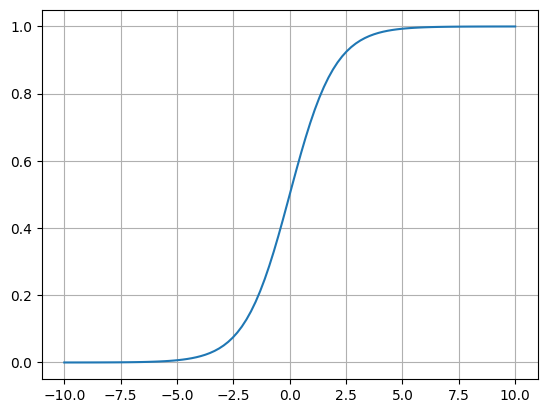

In [56]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoide(x))
plt.grid()
plt.show()

61 Implémentation: Limite de décision

Régression logistique 

Pour 2 caractéristiques


Régression logistique:

y = b + x1*w1 +x2*w2

s(y) = 1/(1+exp(-y))

Limite de décision

Etant donné que l'équation de la droite de décision (peut être un plan ou hyperplan de décision en fonction du nombre de variables indépendantes) est
l'équation de la droite de régression linéaire pour 0, 

(0 = b + w1 * x1 + w2 *x2)

Il est possible de déterminer x2 l'ordonné de la droite en l'abscisse x1 en résolvant l'équation

x2 = -(b + w1 * x1)/w2

In [78]:
#Extraction des valeurs des numpy arrays
b = log.intercept_[0]
w1 = log.coef_[0,0]
w2 = log.coef_[0,1]
x1 = X[:, 0]
print(b, w1, w2)


0.15824859169672864 -4.107500161049015 3.977907107258166


In [79]:
x2 = -(b + w1 * x1)/w2
x2[:10]

array([0.42301562, 0.75868295, 0.39267659, 0.94321698, 0.60889316,
       0.2171865 , 0.75327679, 0.45833807, 0.73149156, 0.34597362])

In [96]:
df

,x1,x2,label
0,0.448196,0.130705,0.0
1,0.773273,0.086142,0.0
2,0.418814,0.634072,1.0
3,0.951985,0.403000,0.0
4,0.628209,0.040618,0.0
...,...,...,...
195,0.213643,0.266799,1.0
196,0.853088,0.248827,0.0
197,0.818051,0.490837,0.0
198,0.761045,0.977934,1.0


In [83]:

#liste compréhension (créée une liste en fonction des conditions)
x_pos = np.array([[x[0], x[1]] for x in df.values if x[2] >= 0.5])
x_neg = np.array([[x[0], x[1]] for x in df.values if x[2] <= 0.5])

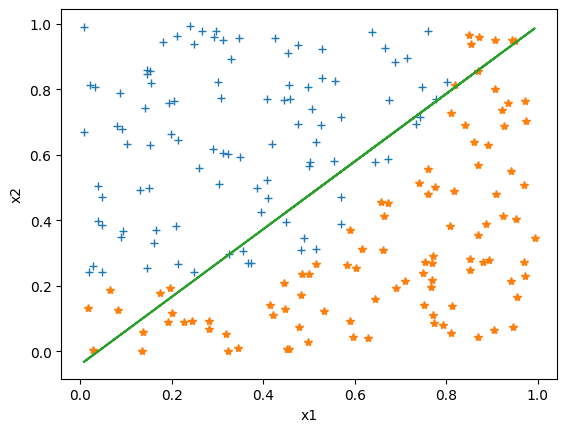

In [99]:
plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x1, x2)
plt.show()


In [ ]:
x_test = [0.4, 0.6]
y_pred = log.predict

[1.]


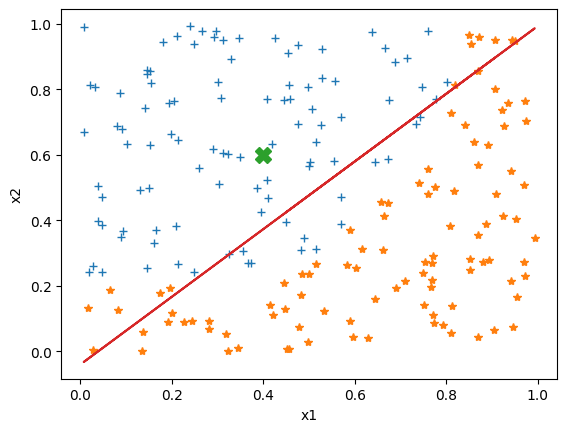

In [106]:
x_test  = [0.4, 0.6]
y_pred  = log.predict([[x_test[0], x_test[1]]])
y_pred

print(y_pred)
plt.plot(x_pos[:, 0], x_pos[:, 1], '+')
plt.plot(x_neg[:, 0], x_neg[:, 1], '*')
plt.plot(x_test[0], x_test[1], 'X', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x1, x2)
plt.show()